<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_04_Crea_tu_primera_estrategia_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Crea tu primera estrategia de trading


### Resumen
* Gestionar los datos
* Media móvil
* Estrategia
* Gráfico
* Calcular el beneficio
* Automatización
* Comparar la estrategia con datos procedentes de diferentes fuentes

<br>



💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

#import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

#  Gestionar los datos



In [3]:
def preprocessing(name:str) -> pd.DataFrame:
  """
  Función de preprocesado
  """
  
  # Importar los datos
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True).dropna()

  # Eliminar las últimas dos columnas
  df = df.iloc[:,:-2]

  # Renombrar 
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [4]:
def preprocessing_yf(symbol:str) -> pd.DataFrame:
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [5]:
df = preprocessing_yf("EURUSD=X")

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,open,high,low,close,volume
time,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0
...,...,...,...,...,...
2023-10-16,1.052155,1.055465,1.051635,1.052155,0
2023-10-17,1.055431,1.059500,1.053341,1.055431,0
2023-10-18,1.057306,1.059547,1.052709,1.057306,0


# Media móvil

In [7]:
# Crear media móvil simple de 30 periodos
df["SMA fast"] = df["close"].rolling(30).mean()

# Crear media móvil simple de 60 periodos
df["SMA slow"] = df["close"].rolling(60).mean()

<Axes: xlabel='time'>

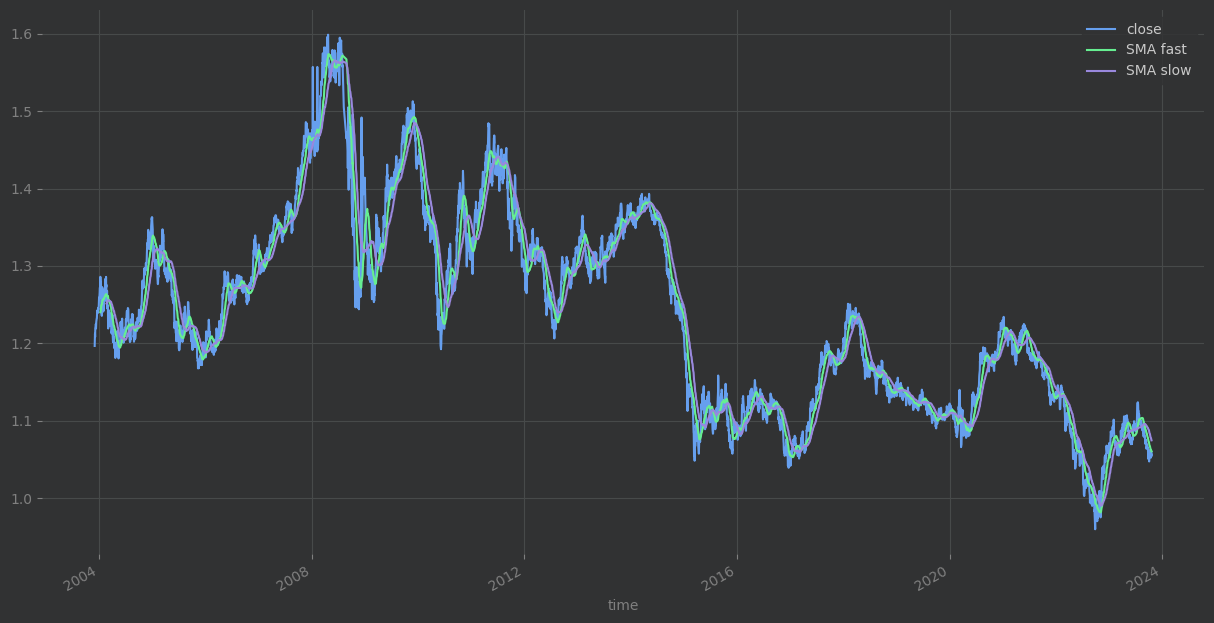

In [8]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

<Axes: xlabel='time'>

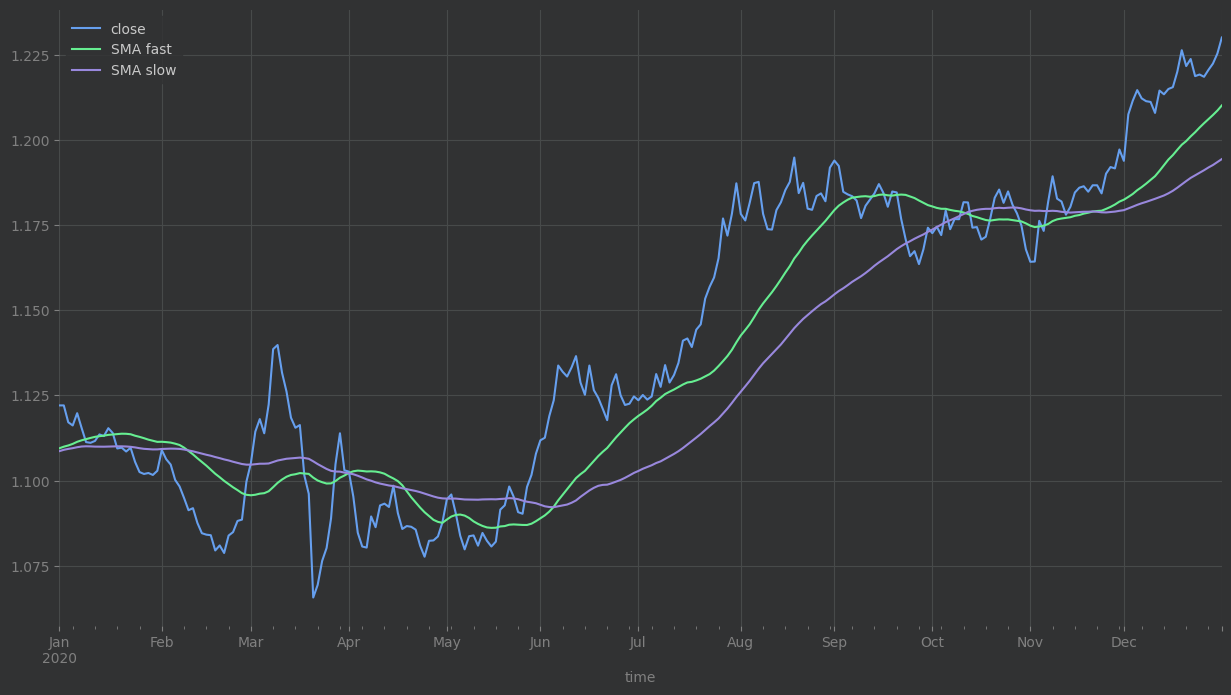

In [11]:
# Grafica las series close, SMA fast y SMA slow del año 2020
df[["close", "SMA fast", "SMA slow"]].loc["2020"].plot(
    figsize=(15,8) #a tuple (width, height) in inches Size of a figure object.
    )

# Estrategia

In [15]:
# Crea una serie con nombre position y le asigna a todos sus valores np.nan
df["position"]=np.nan

# Le pone valor de 1 a cada registro position si el valor de la media rapida es mayor al valor de la media lenta
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1

# Le pone valor de -1 a cada registro position si el valor de la media rapida es menor al valor de la media lenta
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1

# Le pone valor de -1 a cada registro position si el valor de la media rapida es igual al valor de la media lenta
df.loc[(df["SMA fast"] == df["SMA slow"]), "position"] = 0

# Verificación gráfica

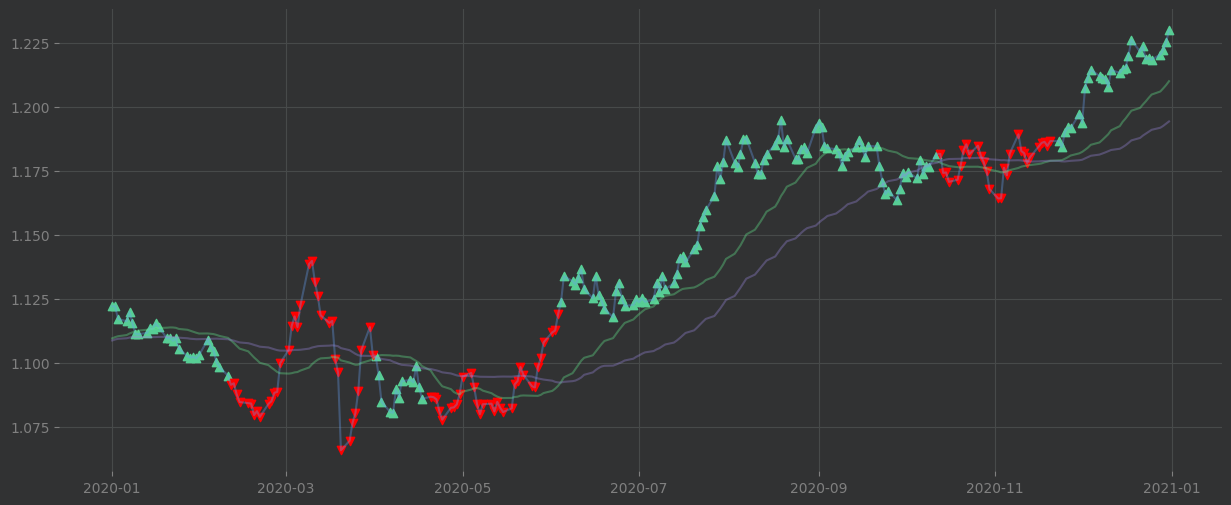

In [16]:
# Representamos toda la señal para asegurarnos de que sea correcta

year="2020"

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index



# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Representar los puntos de la señal de largo en verde
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^")

# Representar los puntos de la señal de corto en rojo
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color= "red", marker="v")


# Representar el cierre
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)

# Representar la media movil rapida
plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)

# Representar la media movil lenta
plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)


# Mostrar el gráfico
plt.show()

# Calcular las ganancias

<Axes: xlabel='time'>

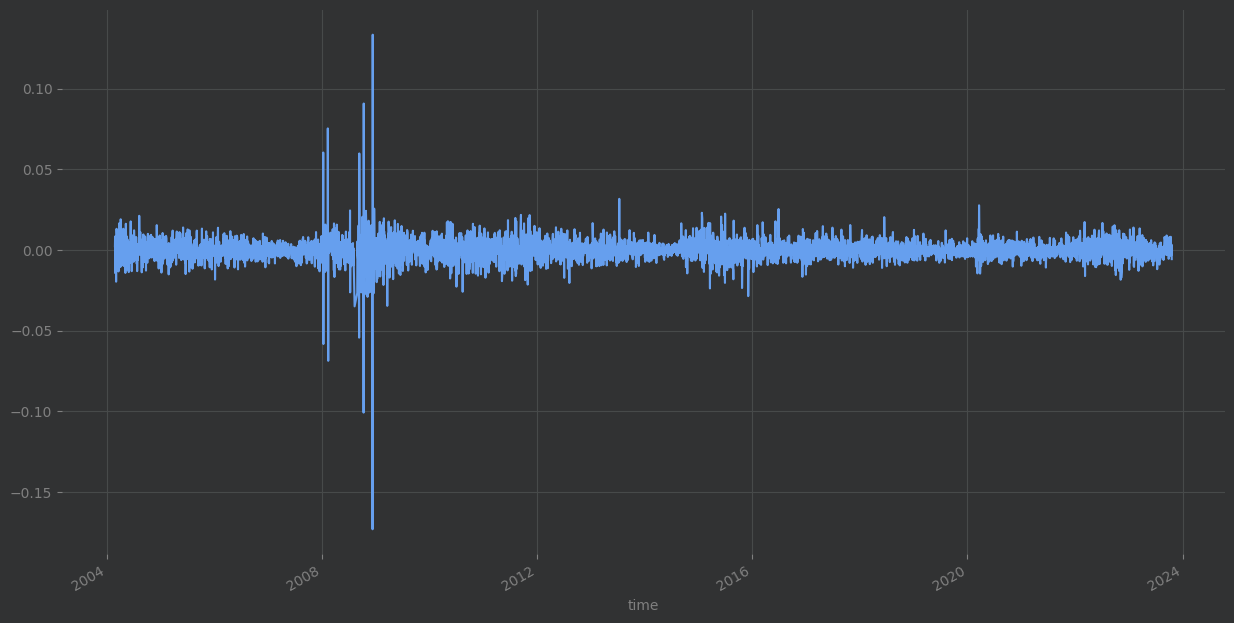

In [17]:
# Calcular el porcentaje de variación del activo,  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html
# porcentualmente, que tanto cambio el valor actual de cierre con el valor anterior
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia. La variacion toma el signo positivo o negativo.
df["return"] = df["pct"] * df["position"].shift(1)


df["return"].plot(figsize=(15,8))

Cabe resaltar que se está asumiendo que:
* El spread es 0: El precio de Bid siempre es igual al precio Ask.
* El Broker o el exchange no estaán cobrando comisiones.

In [ ]:
# Balance dirario (1%, 3%, -1%, -2%, 2%, 3%) -- > Balance acumulado (1%, 4%, 3%, 1%, 3%, 6%)

<Axes: xlabel='time'>

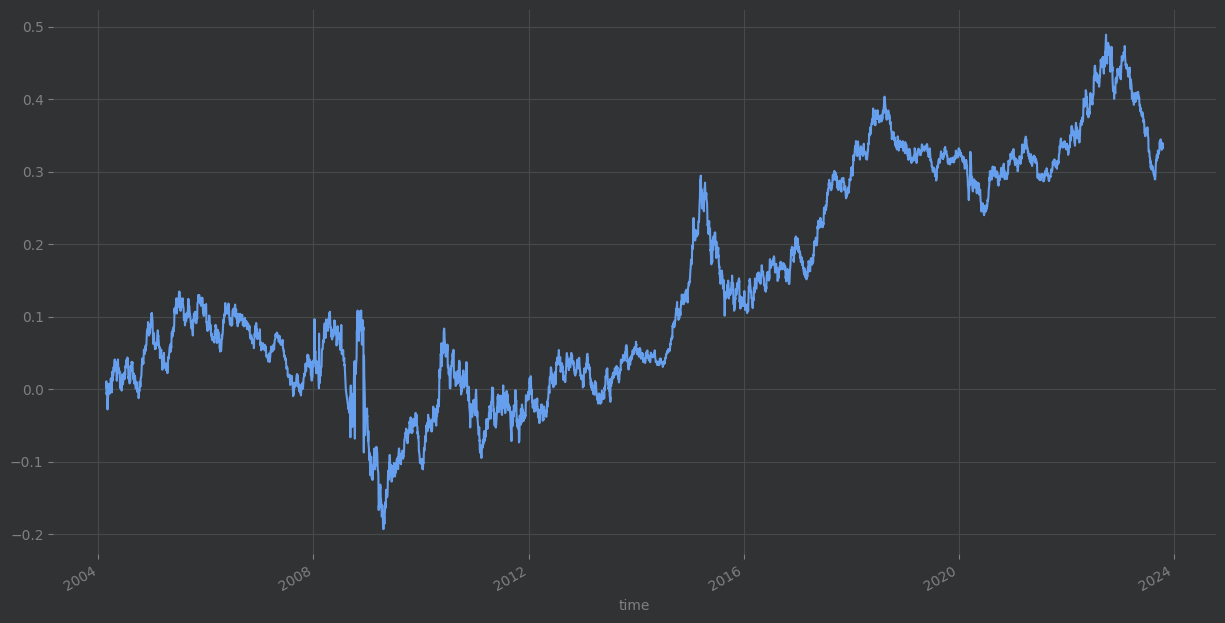

In [27]:
df["return"].cumsum().plot(figsize=(15,8))

# Automatización

In [28]:
def SMA_strategy(input:str, mt5:bool=False, yf:bool=False) -> pd.Series:
  """Retorna la rentabilidad de la estrategia para un simbolo input, con data de mt5 o de yahoo finance."""

  if mt5:
    df = preprocessing(input)
  
  if yf:
    df = preprocessing_yf(input)

  
  # Crear resistencia mediante un máximo rodante
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Crear soporte mediante un mínimo rodante
  df["SMA slow"] = df["close"].rolling(60).mean()

  df["position"] = np.nan

  # Crear la condición
  df.loc[(df["SMA fast"] > df["SMA slow"]) , "position"] = 1
  df.loc[(df["SMA fast"] < df["SMA slow"]) , "position"] = -1
  df.loc[(df["SMA fast"] == df["SMA slow"]) , "position"] = 0

  df["pct"] = df["close"].pct_change(1)

  # Calcular la rentabilidad de la estrategia

  df["return"] = df["pct"] * (df["position"].shift(1))
  

  return df["return"]

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='time'>

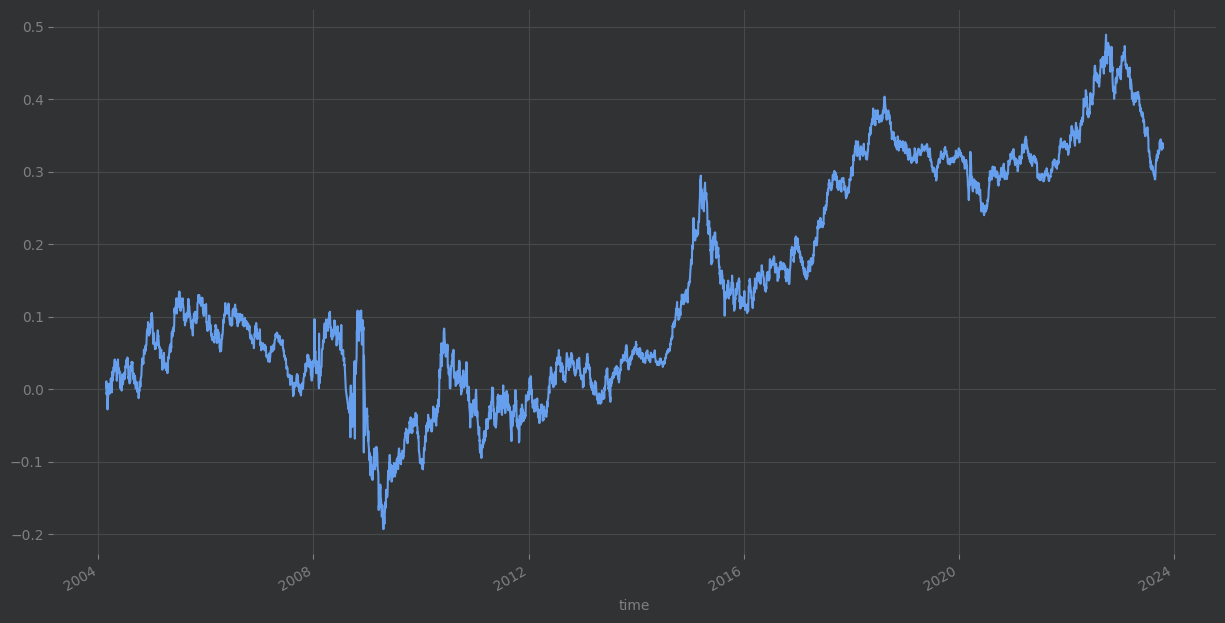

In [29]:
SMA_strategy("EURUSD=X", yf=True).cumsum().plot(figsize=(15,8))

# Comparar la estrategia con diferentes datos

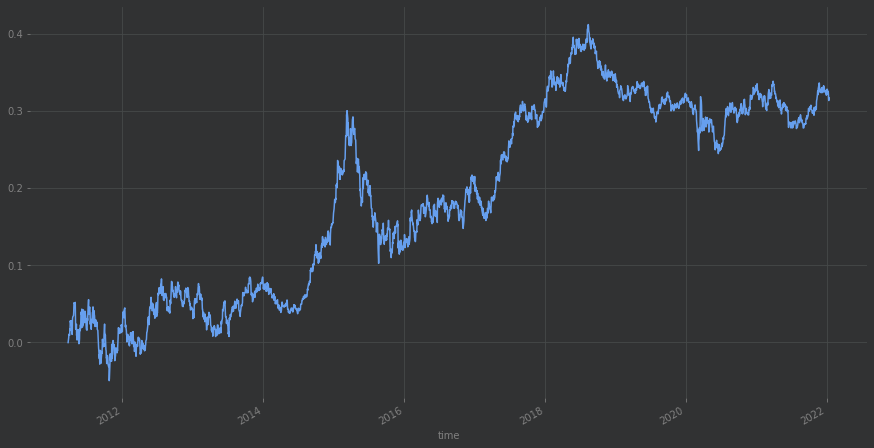

In [15]:
SMA_strategy("EURUSD_D1.csv", mt5=True).cumsum().plot(figsize=(15,8))

[*********************100%***********************]  1 of 1 completed


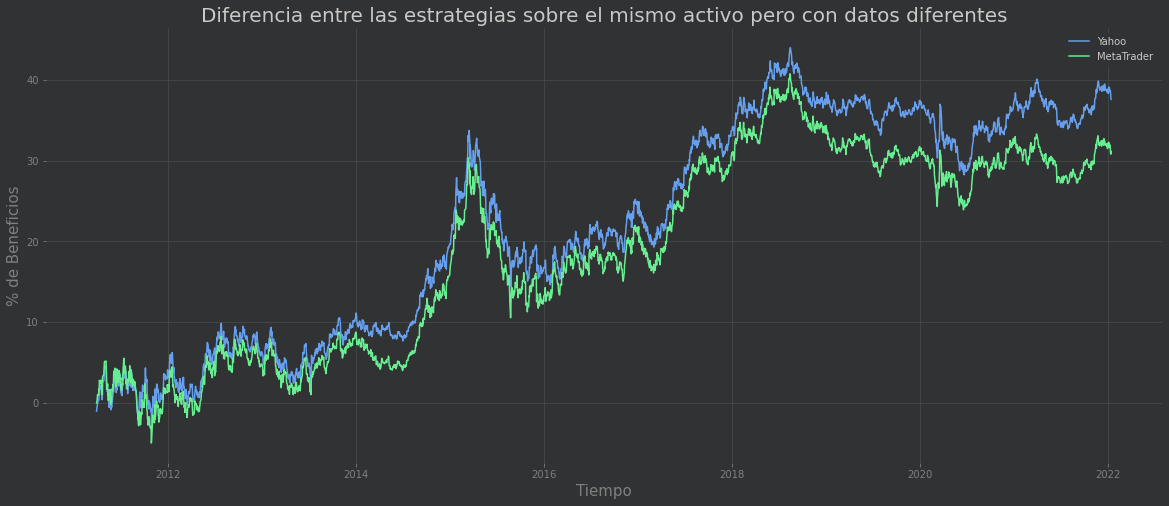

In [16]:
# La misma estrategia pero con diferentes activos
yahoo = SMA_strategy("EURUSD=X", yf=True)
metatrader = SMA_strategy("EURUSD_D1.csv", mt5=True)

returns = pd.DataFrame([yahoo, metatrader], index=["Yahoo",
                                                   "Broker"]).transpose().dropna().cumsum(axis=0)

# Representar el gráfico

# Adaptar el tamaño
plt.figure(figsize=(20,8))

# Representar el retorno
plt.plot(returns["Yahoo"]*100, label="Yahoo")
plt.plot(returns["Broker"]*100, label="MetaTrader")

# Título y nombre de los ejes 
plt.xlabel("Tiempo", size=15)
plt.ylabel("% de Beneficios", size=15)
plt.title("Diferencia entre las estrategias sobre el mismo activo pero con datos diferentes", size=20)


# Leyenda
plt.legend()
plt.show()